In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading the dataset

In [2]:
titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Data preparation

First, let's see if the data is valid. Since thete are only 11 columns, we can check them individually

In [4]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_data[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The values are all valid. We are going to check the null values

### Null values

In [9]:
titanic_data[titanic_data['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [10]:
titanic_data[titanic_data['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
titanic_data[~titanic_data['Cabin'].isna()].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


Cabin has so many null values, and at first seems to have no relation with the other info.

In [12]:
# Encoding
def ohe_sex(titanic_data):
    titanic_data['SexEn'] = titanic_data['Sex'].map({
        'male': 0,
        'female': 1
    })

    return titanic_data

In [13]:
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
def create_age_group(titanic_data, minage, maxage, name, enc):
    titanic_data.loc[(titanic_data['Age'] >= minage) & (titanic_data['Age'] < maxage), 'AgeGroup'] = name
    titanic_data.loc[(titanic_data['Age'] >= minage) & (titanic_data['Age'] < maxage), 'AgeGroupEn'] = enc

    
def groups_of_age(titanic_data):
    titanic_data['AgeGroup'] = 'None'
    titanic_data['AgeGroupEn'] = 0
    groups = [
        [0, 9, 'Child', 0],
        [9, 18, 'Teen', 1],
        [18, 30, 'Young', 2],
        [30, 60, 'Adult', 3],
        [60, 81, 'Elder', 4]
    ]

    for minage, maxage, name, enc in groups:
        create_age_group(titanic_data, minage, maxage, name, enc)
        
    return titanic_data


In [15]:
def ohe_embarked(titanic_data):
    titanic_data = pd.concat([titanic_data, pd.get_dummies(titanic_data.Embarked)], axis='columns')
    return titanic_data

In [16]:
def missing_age(titanic_data):
    titanic_data['Age missing'] = titanic_data['Age'].isna()
    titanic_data.loc[titanic_data['Age'].isna(), 'Age'] = titanic_data.loc[~titanic_data['Age'].isna(), 'Age'].mean()
    return titanic_data

In [17]:
def data_engenerring(titanic_data):
    titanic_data = missing_age(titanic_data)
    
    titanic_data = ohe_sex(titanic_data)
    titanic_data = ohe_embarked(titanic_data)
    titanic_data = groups_of_age(titanic_data)
    
    return titanic_data
    
titanic_data = data_engenerring(titanic_data)

titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age missing,SexEn,C,Q,S,AgeGroup,AgeGroupEn
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,False,0,0,0,1,Young,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,False,1,1,0,0,Adult,3
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,False,1,0,0,1,Young,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,False,1,0,0,1,Adult,3
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,False,0,0,0,1,Adult,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,False,0,0,0,1,Young,2
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,False,1,0,0,1,Young,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,True,1,0,0,1,Young,2


## Model

In [18]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age missing', 'SexEn', 'C', 'Q', 'S',
       'AgeGroup', 'AgeGroupEn'],
      dtype='object')

In [19]:
selected_features = ['Pclass', 'SibSp', 'Parch',
       'Fare', 'Age missing', 'SexEn', 'C', 'Q', 'S',
       'Age']

In [20]:
X = titanic_data[selected_features]
y = titanic_data['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, titanic_data['Survived'].values, test_size=0.2, random_state=7
)
print(X_train.shape)
print(X_test.shape)

(712, 10)
(179, 10)


## Tree classifier

## Final evaluation

In [22]:
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier(
    max_depth = 6, n_estimators=1000, random_state=7, bootstrap=False, criterion='entropy'
)



In [23]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       n_estimators=1000, random_state=7)

In [24]:
from sklearn.metrics import accuracy_score
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
print('Train accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))

Train accuracy 0.8806179775280899
Test accuracy 0.776536312849162


In [25]:
feat_imp_df = pd.DataFrame({
    'Feature name': selected_features,
    'Importance': final_model.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
5,SexEn,0.466861
3,Fare,0.169996
9,Age,0.117810
0,Pclass,0.109861
1,SibSp,0.058035
2,Parch,0.027554
6,C,0.018609
8,S,0.016721
7,Q,0.007315
4,Age missing,0.007236


A lot of overfitting

## Different imputations for missing age

### Mean

### Model prediction

In [26]:
titanic_data_age = titanic_data.loc[~titanic_data['Age'].isna()].copy()
titanic_data_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age missing,SexEn,C,Q,S,AgeGroup,AgeGroupEn
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,False,0,0,0,1,Young,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,False,1,1,0,0,Adult,3
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,False,1,0,0,1,Young,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,False,1,0,0,1,Adult,3
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,False,0,0,0,1,Adult,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,False,0,0,0,1,Young,2
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,False,1,0,0,1,Young,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,True,1,0,0,1,Young,2


In [27]:
selected_features_age = ['Pclass', 'SibSp', 'Parch',
       'Fare', 'SexEn', 'C', 'Q', 'S']

In [28]:
X_train_age, X_test_age, y_train_age, y_test_age = \
    train_test_split(
        titanic_data_age[selected_features_age].values, titanic_data_age['Age'].values,
        test_size=0.2, random_state=7
)

In [29]:
rf_age_params = {'max_depth': range(1, 10)}

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_age = RandomForestRegressor(n_estimators=500)

In [31]:
from sklearn.model_selection import GridSearchCV

cv_rf_impute = GridSearchCV(rf_age, param_grid=rf_age_params, scoring='neg_mean_absolute_error', refit=True,
                            n_jobs=-1, cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [32]:
cv_rf_impute.fit(X_train_age, y_train_age)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_estimators=500), n_jobs=-1,
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=2)

In [33]:
cv_rf_impute.best_params_

{'max_depth': 6}

In [34]:
cv_rf_impute.best_score_

-8.242771329042489

In [35]:
rf_age = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=7)

In [36]:
rf_age.fit(X_train_age, y_train_age)

RandomForestRegressor(max_depth=6, n_estimators=500, random_state=7)

In [37]:
y_test_age_pred = rf_age.predict(X_test_age)

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_age, y_test_age_pred)

8.815667581775434

In [39]:
y_pred_by_mean = np.repeat(titanic_data_age['Age'].mean(), len(y_test_age)).reshape(-1, 1)
y_pred_by_mean[0:3]

array([[29.69911765],
       [29.69911765],
       [29.69911765]])

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_age, y_pred_by_mean)

9.387578047978968

There is litte improvement. Let's see in the model

In [41]:
titanic_data['Age missing'].value_counts()

False    714
True     177
Name: Age missing, dtype: int64

In [42]:
input_age = titanic_data.loc[titanic_data['Age missing'], selected_features_age]

<Axes: >

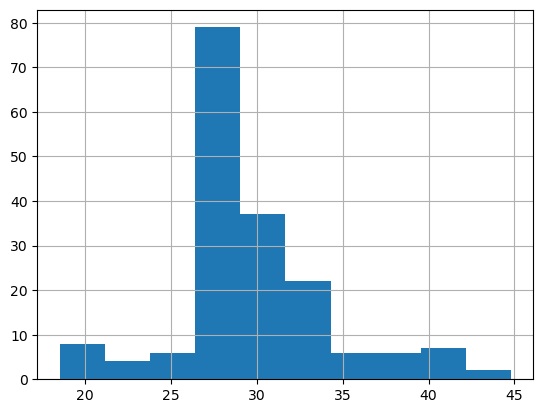

In [43]:
titanic_data.loc[titanic_data['Age missing'], 'Age'] = rf_age.predict(input_age.values)
titanic_data.loc[titanic_data['Age missing'], 'Age'].hist()

In [44]:
titanic_data.loc[titanic_data['Age missing'], 'Age'].describe()

count    177.000000
mean      29.762513
std        4.615302
min       18.541527
25%       28.166623
50%       28.861405
75%       31.565804
max       44.798927
Name: Age, dtype: float64

In [45]:
X = titanic_data[selected_features].values
y = titanic_data['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [46]:
final_model.fit(X_train, y_train)
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
print('Train accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))

Train accuracy 0.8834269662921348
Test accuracy 0.776536312849162


In [47]:
feat_imp_df = pd.DataFrame({
    'Feature name': selected_features,
    'Importance': final_model.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
5,SexEn,0.455317
3,Fare,0.165898
9,Age,0.139081
0,Pclass,0.107634
1,SibSp,0.055957
2,Parch,0.027186
6,C,0.018273
8,S,0.016273
4,Age missing,0.008116
7,Q,0.006264


The accuracy improved a litte

### Classify by age

In [48]:
rf_age_clas = RandomForestClassifier()

In [49]:
X_train_age_clas, X_test_age_clas, y_train_age_clas, y_test_age_clas = \
    train_test_split(
        titanic_data_age[selected_features_age].values, titanic_data_age['AgeGroupEn'].values,
        test_size=0.2, random_state=7
)

In [50]:
cv_rf_impute_clas = GridSearchCV(rf_age_clas, param_grid=rf_age_params, scoring='accuracy', refit=True,
                            n_jobs=-1, cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [51]:
cv_rf_impute_clas.fit(X_train_age_clas, y_train_age_clas)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy', verbose=2)

In [52]:
lr_age_clas = cv_rf_impute_clas.best_estimator_
lr_age_clas

RandomForestClassifier(max_depth=5)

In [53]:
lr_age_clas.fit(X_train_age_clas, y_train_age_clas)

RandomForestClassifier(max_depth=5)

In [54]:
y_age_clas_pred = lr_age_clas.predict(X_test_age_clas)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_age_clas, y_age_clas_pred)

0.5754189944134078

In [56]:
titanic_data['AgeGroupEn'].value_counts() / titanic_data['AgeGroupEn'].value_counts().sum()

2    0.502806
3    0.341190
1    0.066218
0    0.060606
4    0.029181
Name: AgeGroupEn, dtype: float64


## Submission

In [57]:
model = final_model

In [58]:
# train with all data
model.fit(X, y)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       n_estimators=1000, random_state=7)

In [59]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [60]:
# missing values, this can have a better treatment
test_data.loc[test_data['Fare'].isna(), 'Fare'] = test_data['Fare'].mean()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
test_data = data_engenerring(test_data)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age missing,SexEn,C,Q,S,AgeGroup,AgeGroupEn
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,False,0,0,1,0,Adult,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,False,1,0,0,1,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,False,0,0,1,0,Elder,4
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,False,0,0,0,1,Young,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,False,1,0,0,1,Young,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,True,0,0,0,1,Adult,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,False,1,1,0,0,Adult,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,0,0,0,1,Adult,3
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,True,0,0,0,1,Adult,3


In [62]:
input_age_test = test_data.loc[test_data['Age missing'], selected_features_age]
test_data.loc[test_data['Age missing'], 'Age'] = rf_age.predict(input_age_test.values)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age missing,SexEn,C,Q,S,AgeGroup,AgeGroupEn
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,False,0,0,1,0,Adult,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,False,1,0,0,1,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,False,0,0,1,0,Elder,4
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,False,0,0,0,1,Young,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,False,1,0,0,1,Young,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.417149,0,0,A.5. 3236,8.0500,NaN,S,True,0,0,0,1,Adult,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,False,1,1,0,0,Adult,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,0,0,0,1,Adult,3
416,1308,3,"Ware, Mr. Frederick",male,28.417149,0,0,359309,8.0500,NaN,S,True,0,0,0,1,Adult,3


In [63]:
test_data_input = test_data[selected_features]
test_data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   SibSp        418 non-null    int64  
 2   Parch        418 non-null    int64  
 3   Fare         418 non-null    float64
 4   Age missing  418 non-null    bool   
 5   SexEn        418 non-null    int64  
 6   C            418 non-null    uint8  
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
 9   Age          418 non-null    float64
dtypes: bool(1), float64(2), int64(4), uint8(3)
memory usage: 21.4 KB


In [64]:
test_data_pred = model.predict(test_data_input.values)
test_data_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
test_output = test_data[['PassengerId']].copy()
test_output

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [66]:
test_output['Survived'] = test_data_pred
test_output = test_output.set_index('PassengerId')
test_output

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [67]:
test_output.to_csv('submission.csv')